<h1 style="font-size:3rem;color:orange;">Data Science and Business Analytics Tasks</h1>

<img src = "http://www.apu.edu.my/sites/default/files/msc-in-data-science-and-business-analytics_0.jpg">

# Author : Belyout Hasna

<h1 style="font-size:3rem;color:green;">TASK1: Prediction using Supervised ML </h1>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Step1 : Database extraction ,installing and importing the libraries

In [13]:
!pip install numpy

In [28]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [36]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 330.8 kB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 726.2 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)
     ---------------------------------------- 3.3/3.3 MB 495.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
url="http://bit.ly/w-data"
dataset= pd.read_csv(url)
print("dataset import")
dataset.head()

dataset import


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
dataset.shape

(25, 2)

# STEP2 : selection of the columns of the characteristic variables(X) and the column of the variable to be predicted (Y)

In [43]:
X= dataset[['Hours']]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [44]:
Y= dataset[['Scores']]
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


# step3: Checking the relation between Independent and Target Variable

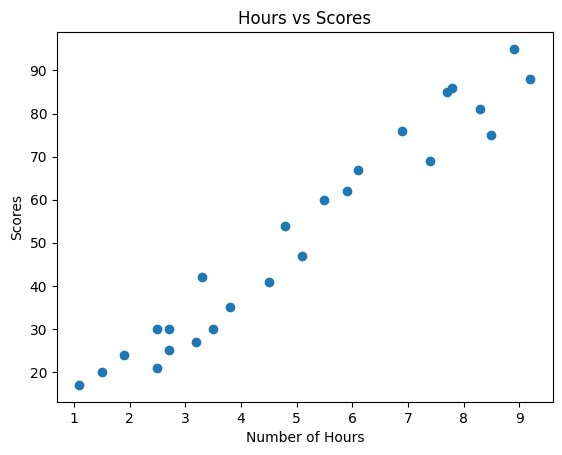

In [47]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

# step 4: Splitting the data into for training and testing

In [56]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.1.2-cp310-cp310-win_amd64.whl (7.4 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     -------------------------------------- 38.6/38.6 MB 506.8 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Hours'].values.reshape(-1,1), dataset['Scores'], test_size = 0.2, random_state = 42)

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

# step 5: Training the Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# step 6: Plotting the predicted Line

In [64]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (dataset['Hours'].values * coefficient) + intercept

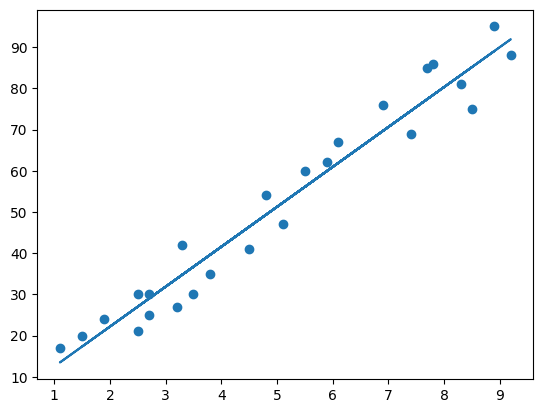

In [66]:
plt.scatter(dataset.Hours, dataset.Scores)
plt.plot(dataset.Hours, line)
plt.show()

In [67]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

# step 7: Comparing Actual and Predicted Values

In [68]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


# step 8: Evaluating the Model

In [69]:
from sklearn import metrics

In [70]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


==============           What will be predicted score if a student studies for 9.25 hrs/day?        =====================


In [74]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student studies for 9.25 hrs/day.")

92.38611528261494 will be predicted score if a student studies for 9.25 hrs/day.
